# 1. Load the Data


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd

data_2016 = pd.read_excel('All Places Census 2016 Population Estimates.xlsx')
data_2017 = pd.read_excel('All states Census 2017 Population Estimates.xlsx')
big_data = pd.read_excel('Big Game Census data.xlsx')

In [61]:
print("2016 Data Overview:")
print(data_2016.head())

print("2017 Data Overview:")
print(data_2017.head())

print("Big Data Overview:")
print(big_data.head())

2016 Data Overview:
      Geographic ID  GEOID 2 Geography, full name (City, State)  \
0  1620000US0100124   100124            Abbeville city, Alabama   
1  1620000US0100460   100460           Adamsville city, Alabama   
2  1620000US0100484   100484              Addison town, Alabama   
3  1620000US0100676   100676                Akron town, Alabama   
4  1620000US0100820   100820            Alabaster city, Alabama   

  April 1, 2010 - Census  April 1, 2010 - Estimates Base  \
0                   2688                            2688   
1                   4522                            4522   
2                    758                             756   
3                    356                             356   
4                  30352                           31066   

   Population Estimate (as of July 1) - 2010  \
0                                       2683   
1                                       4517   
2                                        754   
3                       

In [62]:
print("Missing values in 2016 data:\n", data_2016.isnull().sum())
print("Missing values in 2017 data:\n", data_2017.isnull().sum())
print("Missing values in Big Data:\n", big_data.isnull().sum())


Missing values in 2016 data:
 Geographic ID                                0
GEOID 2                                      0
Geography, full name (City, State)           0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1) - 2012    0
Population Estimate (as of July 1) - 2013    0
Population Estimate (as of July 1) - 2014    0
Population Estimate (as of July 1) - 2015    0
Population Estimate (as of July 1) - 2016    0
dtype: int64
Missing values in 2017 data:
 GEOID                                        0
GEOID2                                       0
Geography Name                               0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1)

# 2. Clean and Inspect the Data


In [63]:
print(big_data.isnull().sum())

big_data.dropna(inplace=True)

big_data.drop_duplicates(inplace=True)

print(big_data.head())


Player Name                                                 2
Player Jersey Number                                        3
Player Position                                             3
Player Age                                                  3
Player Weight (lbs.)                                        3
Years Played                                                3
Player Birthplace (city, town, etc.)                        3
Player Birth State                                          3
Player Birthplace (Combo)                                   3
Player College                                              3
Player Team                                                 3
Conference                                                  3
2016 Population Estimates (except where otherwise noted)    3
State GEO ID                                                3
Full GEOID                                                  3
Latitude (player birthplace)                                3
Longitud

In [64]:
%matplotlib inline


# 3. Analyze Fun Facts


# Top Birth States


Top 10 Birth States:
 Player Birth State
California        15
Texas             14
Florida           13
Ohio               9
New Jersey         7
New York           5
Maryland           4
North Carolina     4
Georgia            4
Nevada             3
Name: count, dtype: int64


C:\Users\vijay\AppData\Local\Temp\ipykernel_6340\2591486784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_birth_states.values, y=top_birth_states.index, palette='viridis')


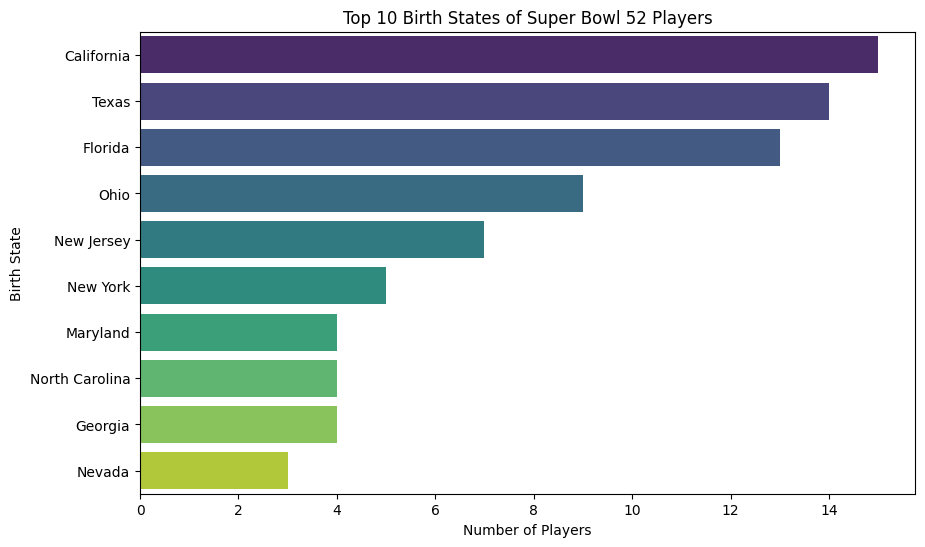

In [65]:
if 'Player Birth State' in big_data.columns:
    top_birth_states = big_data['Player Birth State'].value_counts().head(10)
    print("Top 10 Birth States:\n", top_birth_states)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_birth_states.values, y=top_birth_states.index, palette='viridis')
    plt.title('Top 10 Birth States of Super Bowl 52 Players')
    plt.xlabel('Number of Players')
    plt.ylabel('Birth State')
    plt.show()
else:
    print("'Player Birth State' column not found.")


# Age Group Distribution by Position


Average Age by Player Position:
 Player Position
DE             23.000000
DE/LDT         23.000000
KR/RB          23.000000
DT             23.000000
LB/SPTM/RLB    23.000000
LB/RLB         24.000000
C/ROG          24.000000
G/C            24.000000
T/LOG          24.000000
S/FS/SPTM      24.000000
DT/RDT         24.250000
CB/RCB         24.500000
DE/RDE         24.800000
LB/LS          25.000000
CB/LCB         25.000000
RB/KR          25.000000
G/LOG          25.500000
WR             25.833333
G/ROG          26.000000
T/ROT          26.000000
WR/PR          26.500000
DT/LDT         26.500000
S/SS           26.666667
CB/SPTM/RCB    27.000000
RB/SPTM        27.000000
RB/KR/PR       27.000000
LB/LLB         27.250000
RB             27.285714
C              27.500000
K/KFG/KKO      27.500000
TE             27.714286
T/LOT          27.750000
C/LOG          28.000000
LB/LLB/SPTM    28.000000
DE/LDE         28.250000
S/FS           28.750000
RB/FB          29.000000
QB             29.800000
S

C:\Users\vijay\AppData\Local\Temp\ipykernel_6340\2246911062.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_by_position.index, y=age_by_position.values, palette='coolwarm')


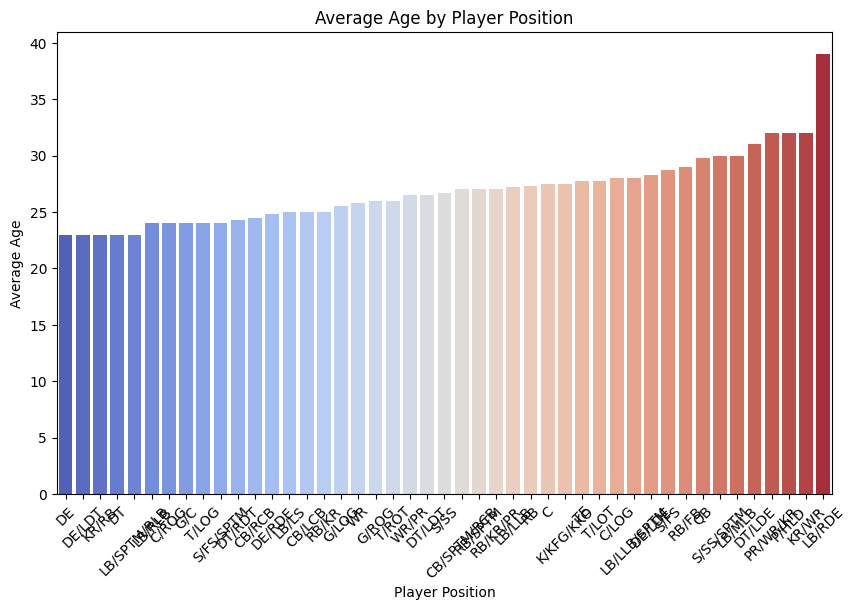

In [66]:
if 'Player Position' in big_data.columns and 'Player Age' in big_data.columns:
    age_by_position = big_data.groupby('Player Position')['Player Age'].mean().sort_values()
    
    print("Average Age by Player Position:\n", age_by_position)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=age_by_position.index, y=age_by_position.values, palette='coolwarm')
    plt.title('Average Age by Player Position')
    plt.xlabel('Player Position')
    plt.ylabel('Average Age')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("'player position' and/or 'player age' columns not found.")


#  Player Weight Analysis


Average Weight by Position:
 Player Position
CB/LCB         188.600000
PR/WR/KR       190.000000
K/KFG/KKO      191.000000
WR/PR          195.000000
RB/KR/PR       195.000000
S/FS           197.750000
CB/RCB         199.250000
RB/KR          201.500000
WR             202.416667
S/SS/SPTM      204.000000
KR/WR          205.000000
CB/SPTM/RCB    206.000000
S/SS           206.333333
RB             210.428571
S/FS/SPTM      220.000000
RB/SPTM        220.000000
LB/SPTM/RLB    220.000000
KR/RB          220.000000
P/HLD          220.500000
QB             229.400000
LB/RLB         231.000000
LB/MLB         241.666667
LB/RDE         242.000000
LB/LLB         243.750000
LB/LLB/SPTM    244.000000
LB/LS          247.000000
TE             254.857143
RB/FB          255.000000
DE             259.500000
DE/RDE         265.200000
DE/LDT         271.000000
DE/LDE         276.250000
C              295.000000
DT             304.000000
C/LOG          305.000000
G/C            305.000000
C/ROG          310.

C:\Users\vijay\AppData\Local\Temp\ipykernel_6340\4226334545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_weight_by_position.index, y=avg_weight_by_position.values, palette='magma')


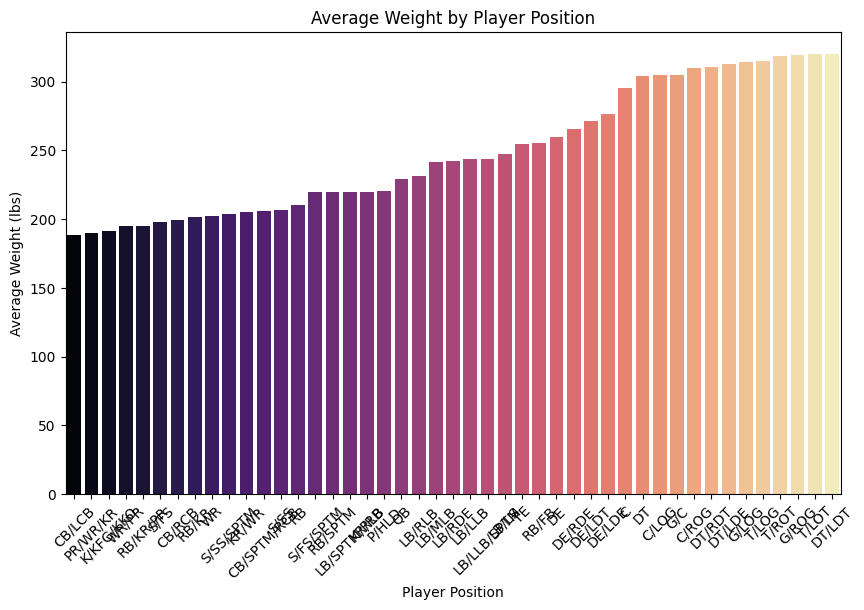

In [67]:
if 'Player Position' in big_data.columns and 'Player Weight (lbs.)' in big_data.columns:
    avg_weight_by_position = big_data.groupby('Player Position')['Player Weight (lbs.)'].mean().sort_values()
    print("Average Weight by Position:\n", avg_weight_by_position)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_weight_by_position.index, y=avg_weight_by_position.values, palette='magma')
    plt.title('Average Weight by Player Position')
    plt.xlabel('Player Position')
    plt.ylabel('Average Weight (lbs)')
    plt.xticks(rotation=45)
    plt.show()


# 4. Geographical Distribution of Players’ Birthplaces


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

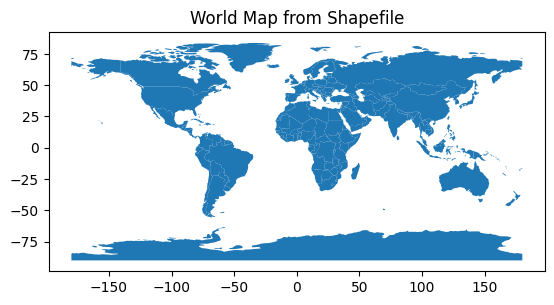

In [68]:


shapefile_path = 'ne_110m_admin_0_countries.shp'

world = gpd.read_file(shapefile_path)

print(world.head())

world.plot()
plt.title('World Map from Shapefile')
plt.show()


In [69]:
print(big_data[['Latitude (player birthplace)', 'Longitude (player birthplace)']].head())


   Latitude (player birthplace)  Longitude (player birthplace)
0                     41.088707                     -74.013473
1                     30.173419                     -95.504686
2                     38.990666                     -77.026088
3                     41.009542                     -74.172922
4                     40.320097                     -75.610184


In [70]:


geometry = [Point(xy) for xy in zip(big_data['Longitude (player birthplace)'], big_data['Latitude (player birthplace)'])]
geo_df = gpd.GeoDataFrame(big_data, geometry=geometry)

print(geo_df.head())


        Player Name Player Jersey Number Player Position  Player Age  \
0    Devin McCourty                  #32            S/FS        30.0   
1    Danny Amendola                  #80        PR/WR/KR        32.0   
2  Johnson Bademosi                  #29     CB/SPTM/RCB        27.0   
3       Chris Hogan                  #15              WR        29.0   
4     James Develin                  #46           RB/FB        29.0   

   Player Weight (lbs.) Years Played Player Birthplace (city, town, etc.)  \
0                 195.0            8                               Nanuet   
1                 190.0            9                        The Woodlands   
2                 206.0            6                        Silver Spring   
3                 210.0            5                              Wyckoff   
4                 255.0            5                        Gilbertsville   

  Player Birth State    Player Birthplace (Combo) Player College  ...  \
0           New York           

# Plotting Player Birthplaces on a Map:

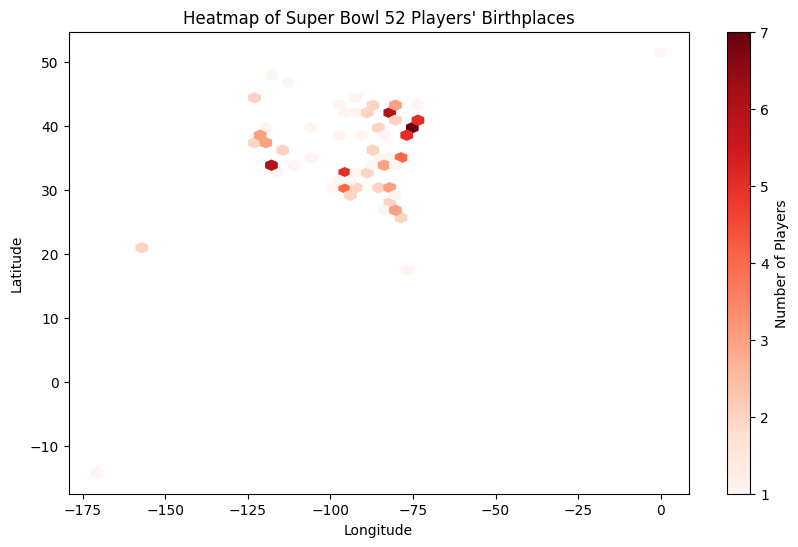

In [71]:
plt.figure(figsize=(10, 6))
plt.hexbin(geo_df['Longitude (player birthplace)'], geo_df['Latitude (player birthplace)'],
           gridsize=50, cmap='Reds', mincnt=1)
plt.colorbar(label='Number of Players')
plt.title('Heatmap of Super Bowl 52 Players\' Birthplaces')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Heatmap of Player Birthplaces

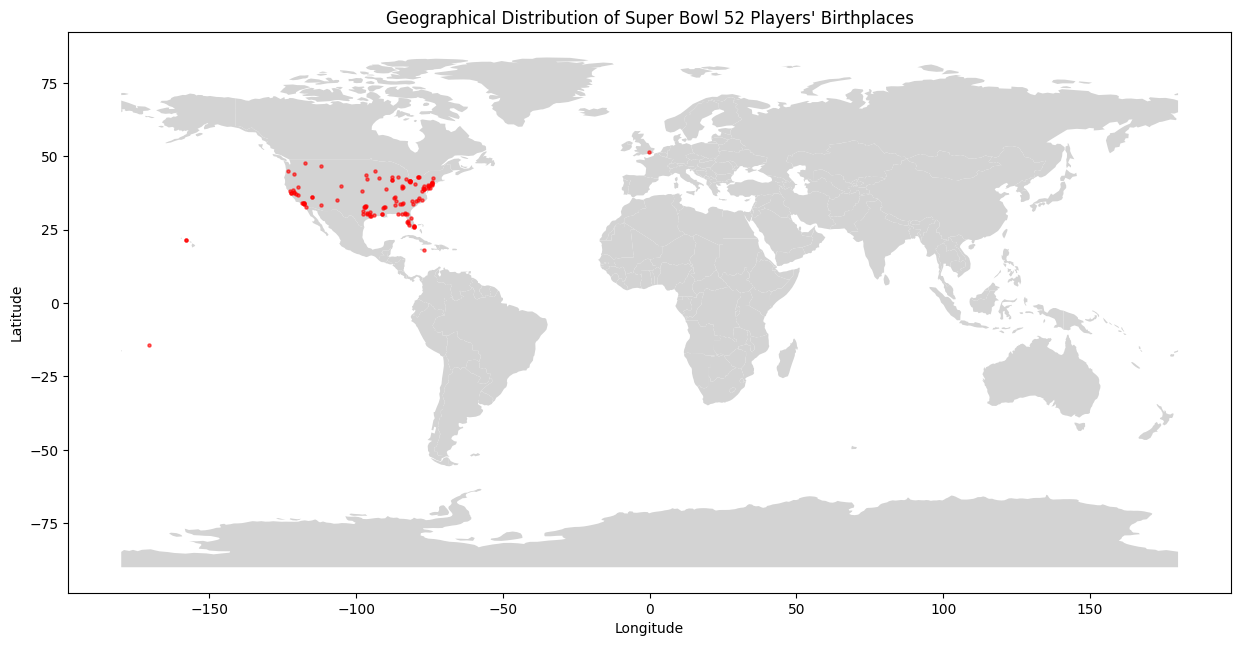

In [72]:

world = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.6)  
plt.title('Geographical Distribution of Super Bowl 52 Players\' Birthplaces')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# 5. Explore Other Insights


# Top Colleges


C:\Users\vijay\AppData\Local\Temp\ipykernel_6340\565781041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=college_counts.values, y=college_counts.index, palette='Blues')


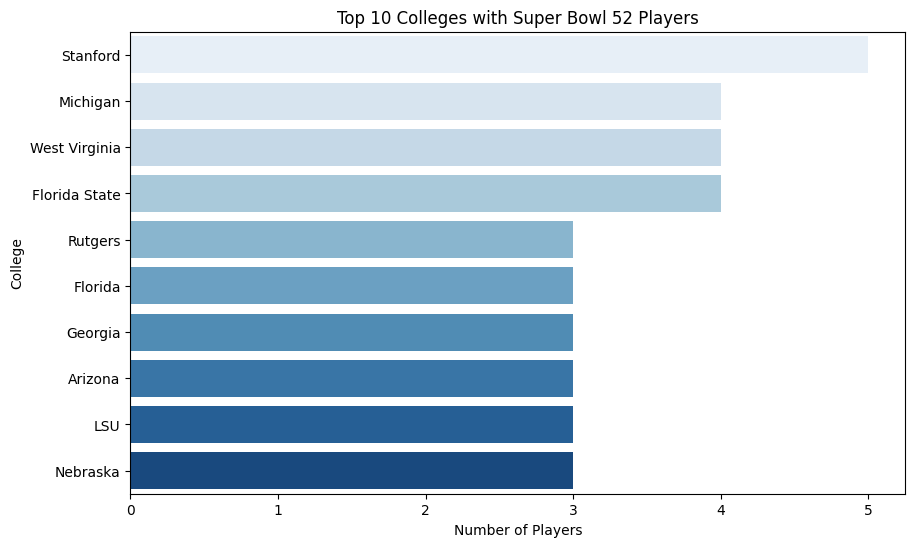

In [73]:
if 'Player College' in big_data.columns:
    college_counts = big_data['Player College'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=college_counts.values, y=college_counts.index, palette='Blues')
    plt.title('Top 10 Colleges with Super Bowl 52 Players')
    plt.xlabel('Number of Players')
    plt.ylabel('College')
    plt.show()


#  Player Teams


C:\Users\vijay\AppData\Local\Temp\ipykernel_6340\2738360587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.index, y=team_counts.values, palette='Greens')


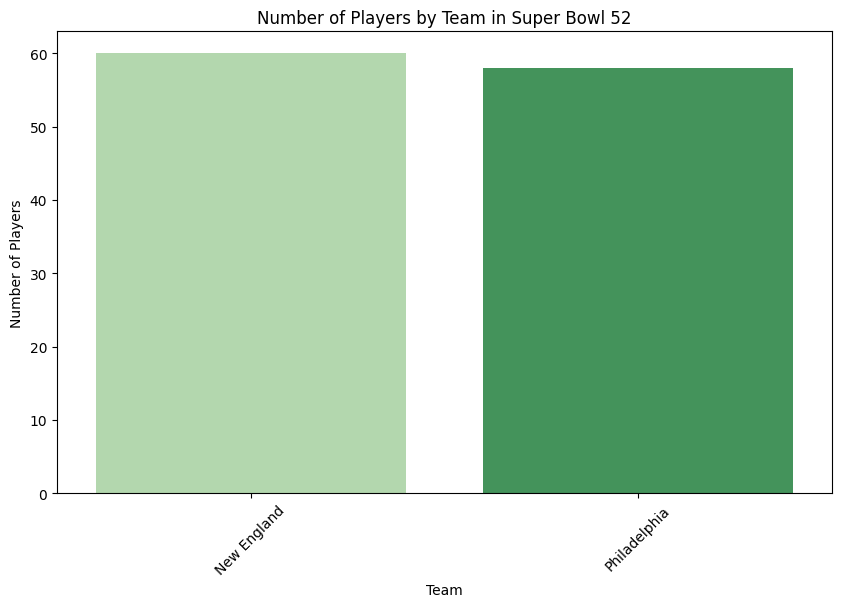

In [74]:
if 'Player Team' in big_data.columns:
    team_counts = big_data['Player Team'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=team_counts.index, y=team_counts.values, palette='Greens')
    plt.title('Number of Players by Team in Super Bowl 52')
    plt.xlabel('Team')
    plt.ylabel('Number of Players')
    plt.xticks(rotation=45)
    plt.show()


# 6.  Population Data Comparison



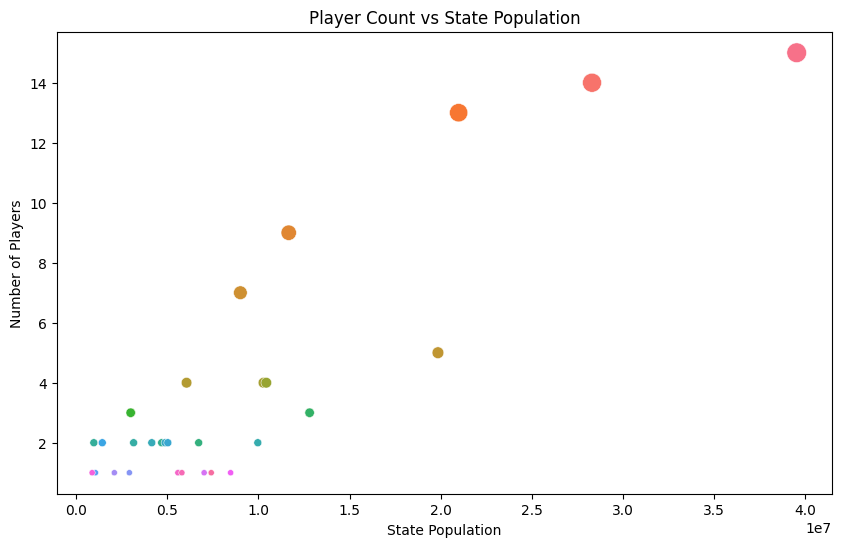

In [75]:

player_counts = big_data['Player Birth State'].value_counts().reset_index()
player_counts.columns = ['state', 'player_count']
merged = pd.merge(player_counts, state_population, on='state')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='population', y='player_count', hue='state', size='player_count', sizes=(20, 200), legend=False)
plt.title('Player Count vs State Population')
plt.xlabel('State Population')
plt.ylabel('Number of Players')
plt.show()


# 7. Scatter Plot Visualization


In [76]:
correlation = merged['population'].corr(merged['player_count'])
print(f'Correlation between state population and player count: {correlation:.2f}')


Correlation between state population and player count: 0.87


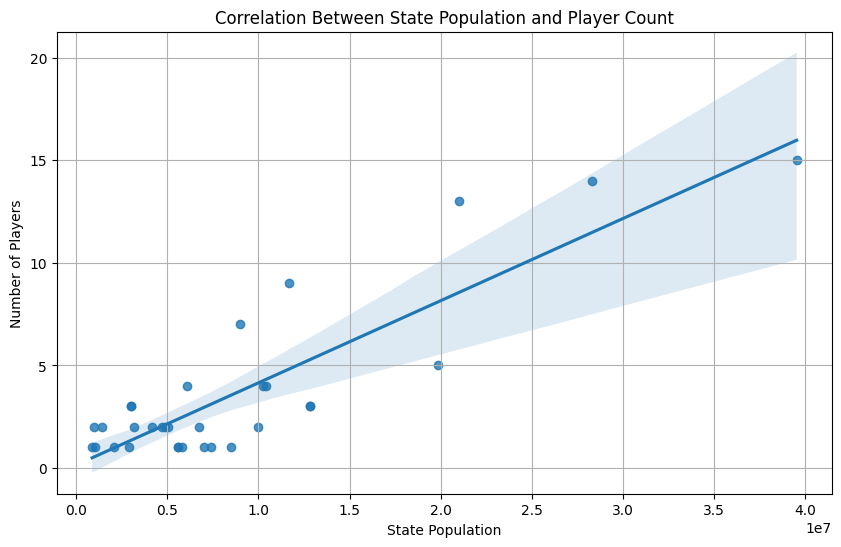

In [77]:
plt.figure(figsize=(10, 6))
sns.regplot(data=merged, x='population', y='player_count', marker='o')
plt.title('Correlation Between State Population and Player Count')
plt.xlabel('State Population')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()


# 8. Identifying Trends and Discrepancies


In [78]:
merged['expected_count'] = (merged['population'] / merged['population'].sum()) * player_counts['player_count'].sum()

merged['discrepancy'] = merged['player_count'] - merged['expected_count']
significant_discrepancies = merged[merged['discrepancy'].abs() > 5]  

print("States with significant discrepancies:\n", significant_discrepancies[['state', 'player_count', 'expected_count', 'discrepancy']])


States with significant discrepancies:
 Empty DataFrame
Columns: [state, player_count, expected_count, discrepancy]
Index: []
